In [19]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.image import imsave

In [2]:

src_1= ''
src_2= 'manu_big_data/train_sample_total/'
src_3 = 'manu_big_data/guangdong_round1_test_a_20180916/guangdong_round1_test_a_20180916/'  # test data directory
src_save = 'manu_big_data/new_era/data_aug_gen/'


In [48]:


with open(src_1+'failure_to_label.pkl', 'rb') as handle:
    label_dict = pickle.load(handle)

    
test_df =pd.read_csv(src_1+'test_csv')
test_file_list = test_df['img'].tolist()


.DS_Store deleted
['不导', '擦花', '横条', '碰伤', '涂层', '其他']


ok


In [78]:
for f in test_file_list:
    if f[:2] != '正常':
    
        img = load_img(src_3+f)
        #plt.imshow(img)
        #img = img.resize(2560//4,1920//4)
        img = img.resize((2560//8,1920//8))
        #img.save(src_save+'try_file.jpeg', 'JPEG')

        x = img_to_array(img).astype('uint')
        my_filter = (x.max(axis=2) - x.min(axis=2)) < 50  # get mask 

        for k in range(3):           
            x[:,:,k] *= my_filter  # mask out the unnecessary part
        imsave(src_save+f[:-4]+'_small'+'.png', x)

In [7]:

def make_aug_dict(total_file_list,aug_list):
    aug_dict = {}
    for aug in aug_list:
        aug_dict[aug] = [f for f in total_file_list if f[:2] == aug]

    return aug_dict

In [54]:

datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening = True,
    fill_mode='nearest')

/Users/LarryGuo/miniconda3/envs/inpainting-style/lib/python3.6/site-packages/keras_preprocessing/image.py:758: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [79]:

total_file_list_small = os.listdir(src_save)
print (f'file length {len(total_file_list_small)}')  
print (total_file_list_small[:5])
if '.DS_Store' in total_file_list_small:
    total_file_list_small.remove('.DS_Store')
    print ('.DS_Store deleted')
for f in total_file_list_small:
    if 'aug' in f:
        total_file_list_small.remove(f)
        #print (f'{f[:5]}removed')
print (f'file length {len(total_file_list_small)}')    
if '.DS_Store' in total_file_list_small:
    print ('wrong')
else:
    print ('ok')

file length 1369
['脏点20180910093625对照样本_02_small.png', '漏底20180901095227对照样本_01_small.png', '凸粉20180901101652对照样本_01_small.png', '漏底20180829173710对照样本_02_small.png', '擦花20180911104021对照样本_02_small.png']
.DS_Store deleted
file length 1368
ok


In [81]:




for f in total_file_list_small:
    if f[:2] in aug_list:
        size = 20
    else:
        size = 5 


    img = load_img(src_save+f)  # this is a PIL image

    # convert image to numpy array with shape (3, width, height)
    img_arr = img_to_array(img)


    # convert to numpy array with shape (1, 3, width, height)
    img_arr = img_arr.reshape((1,) + img_arr.shape)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `data/augmented` directory
    i = 0
    for batch in datagen.flow(
        img_arr,
        batch_size=1,
        save_to_dir=src_save+'new',
        save_prefix=f[:2]+'_aug_'+f[3:-8],
        save_format='png'):
        i += 1
        if i > size:
            break  # otherwise the generator would loop indefinitely

/Users/LarryGuo/miniconda3/envs/inpainting-style/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/LarryGuo/miniconda3/envs/inpainting-style/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [82]:
total_file_list_small = os.listdir(src_save+'new')
print (len(total_file_list_small))

17411


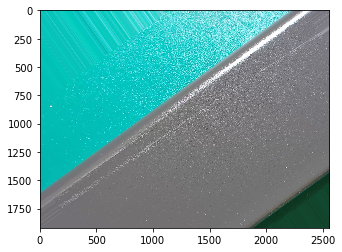

In [40]:
img = load_img(src_save+'擦花aug_0_2392.png')
plt.imshow(img)
#img = img.resize(2560//4,1920//4)
img = img.resize((2560//8,1920//8))
#img.save(src_save+'try_file.jpeg', 'JPEG')

x = img_to_array(img).astype('uint')
my_filter = (x.max(axis=2) - x.min(axis=2)) < 50  # get mask 
        
for k in range(3):           
    x[:,:,k] *= my_filter  # mask out the unnecessary part
imsave(src_save+'try_file.png', x)



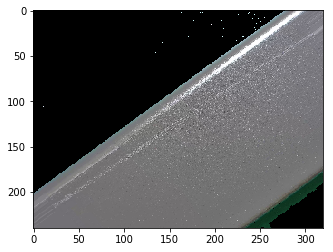

In [33]:
img = load_img(src_save+'try_file.png')
plt.imshow(img)